<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/iqbal_facial_emotion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name -facial emotion recognition CNN**

**Project Type - EDA/Classification**

**Contribution - Individual**

**By-Iqbal Shaikh**

**Provide your GitHub Link here.**

About Dataset
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
#If data too big load in google drive and connect to colab
# Mount Google Drive in Colab using the following code:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#If your file is inside a folder, list files in that folder:
!ls "/content/drive/My Drive/iqbal-facial emotion CNN"

'archive (1).zip'


In [ ]:
# Extract the ZIP file inside Google Drive to avoid re-uploading every time.
import zipfile
import os

zip_path = "/content/drive/My Drive/iqbal-facial emotion CNN/archive (1).zip"  # Update with your actual file path
extract_path = "/content/dataset"  # Destination folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

Extraction complete!


In [ ]:
# Step 5: Verify the Extracted Files
# To make sure the files were extracted, list them:
!ls "/content/dataset"

test  train


In [ ]:
#First, check your extracted files:
import os

train_dir = "/content/dataset/train"  # Path to train folder
test_dir = "/content/dataset/test"    # Path to test folder

# List files in train and test folders
print("Train files:", os.listdir(train_dir)[:7])  # Show first 5 files
print("Test files:", os.listdir(test_dir)[:7])    # Show first 5 files

Train files: ['neutral', 'disgust', 'surprise', 'sad', 'angry', 'fear', 'happy']
Test files: ['neutral', 'disgust', 'surprise', 'sad', 'angry', 'fear', 'happy']


In [ ]:
# Image Data Generator for loading images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(48, 48), batch_size=32, class_mode='categorical')

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(48, 48), batch_size=32, class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


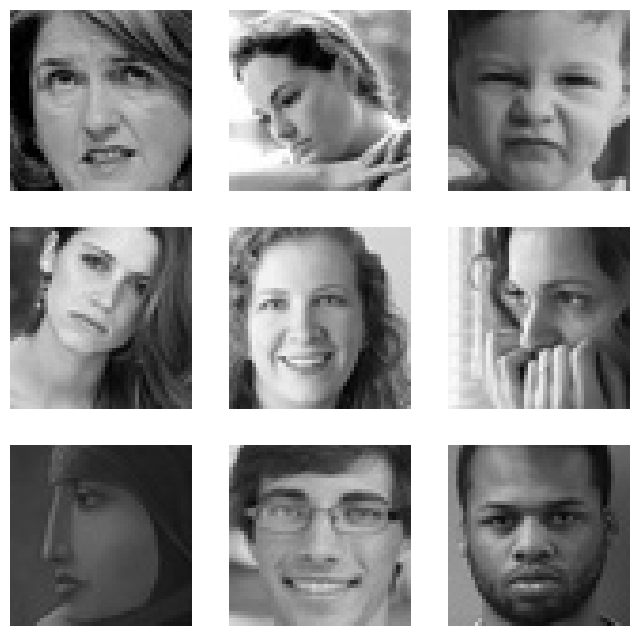

In [ ]:
#  Verify Data Loading
# Check class labels and visualize some images:
# Get a batch of images
images, labels = next(train_data)

# Plot some images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for img, ax in zip(images[:9], axes):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
print(train_data.dtype)

float32


**No Need to Convert to Pixel Values:**
If your image is already in float32 format (especially with values normalized to 0-1), there's no need to convert it again to pixel values like 0-255.

**Understanding Image Data in float32:**
Pixel Values: Image data typically comes in integer form (like uint8 for 0-255 pixel values). However, when processed for machine learning or deep learning tasks, the pixel values are often normalized to a float32 range, such as 0.0 to 1.0 by dividing by 255.

For example, a pixel value of 255 in uint8 becomes 1.0 in float32.

In [ ]:
#LABELS=0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
# Path to the 'angry' folder in both train and test datasets
train_angry_dir = os.path.join(train_dir, 'angry')
test_angry_dir = os.path.join(test_dir, 'angry')#When you use os.path.join(test_dir, 'angry'), it combines the test_dir variable (the path to your test dataset directory)
                                               # with the subfolder name 'angry' to create the full path to the Angry images in your test data folder.
# Count the number of images in the 'angry' folder in the train dataset
train_angry_count = len(os.listdir(train_angry_dir))#os.listdir(directory): This lists all the files in the given directory.
print("Number of Angry images in train dataset:", train_angry_count)
# Count the number of images in the 'angry' folder in the test dataset
test_angry_count = len(os.listdir(test_angry_dir))
print("Number of Angry images in test dataset:", test_angry_count)

Number of Angry images in train dataset: 3995
Number of Angry images in test dataset: 958


In [ ]:
# Get the list of image filenames in the 'angry' folder (train and test)
train_angry_images = os.listdir(train_angry_dir)#os.listdir(): Lists all files in the 'angry' folder.
test_angry_images = os.listdir(test_angry_dir)

In [ ]:
# Load the first image from both train and test
train_image0_path = os.path.join(train_angry_dir, train_angry_images[0])
test_image0_path = os.path.join(test_angry_dir, test_angry_images[0])

In [ ]:
# Open the images using PIL
train_image0 = Image.open(train_image0_path)#Image.open(): Opens the image file.
test_image0 = Image.open(test_image0_path)

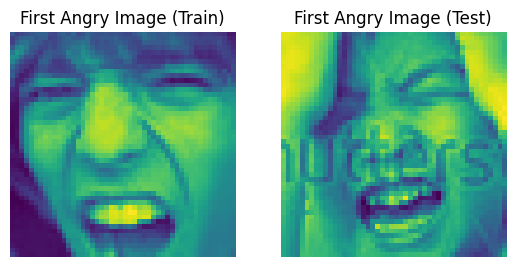

In [ ]:
# Show the first image from the train dataset
plt.subplot(1, 2, 1)
plt.imshow(train_image0)
plt.title("First Angry Image (Train)")
plt.axis('off')  # Hide axes

# Show the first image from the test dataset
plt.subplot(1, 2, 2)
plt.imshow(test_image0)
plt.title("First Angry Image (Test)")
plt.axis('off')  # Hide axes

plt.show()

In [ ]:
# Convert the images to numpy arrays (pixel values)
train_image0_array = np.array(train_image0)
test_image0_array = np.array(test_image0)

In [ ]:
# Display the pixel values
print("Pixel values of the first Angry image (Train):")
print(train_image0_array)

print("\nPixel values of the first Angry image (Test):")
print(test_image0_array)

Pixel values of the first Angry image (Train):
[[ 69  51  57 ...  41  26  27]
 [ 51  64  75 ...  47  34  31]
 [ 53  75  87 ...  50  41  35]
 ...
 [ 25  21  20 ...  97  96  94]
 [ 38  27  22 ... 100  95  89]
 [ 50  33  22 ...  99  92  82]]

Pixel values of the first Angry image (Test):
[[210 210 208 ... 159 155 155]
 [210 209 205 ... 164 157 151]
 [207 208 206 ... 167 158 147]
 ...
 [135 127 112 ...  71  68  91]
 [134 124 111 ...  74  82 120]
 [134 122 112 ...  73  93 137]]


Convert all to np array

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Function to load and preprocess images
def load_and_preprocess_images(data_dir, image_size=(64, 64)):
    # List to hold image data and labels
    images = []
    labels = []

    # Get the list of class names (subfolders in the dataset)
    class_names = os.listdir(data_dir)

    # Loop through each class (folder)
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        image_files = os.listdir(class_dir)

        # Loop through each image in the class folder
        for image_file in image_files:
            image_path = os.path.join(class_dir, image_file)

            # Open the image using PIL
            image = Image.open(image_path)

            # Resize the image to the desired size
            image = image.resize(image_size)

            # Convert image to a numpy array (pixel values)
            image_array = np.array(image)

            # Normalize pixel values to range [0, 1]
            image_array = image_array / 255.0

            # Append the image and label
            images.append(image_array)
            labels.append(class_name)  # Label is the folder name

    # Convert images and labels to numpy arrays
    images = np.array(images)

    # Encode the labels as integers (e.g., Angry=0, Happy=1, etc.)
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return images, labels

# Path to the train and test datasets
train_data_dir = "/content/dataset/train"  # Replace with your actual path
test_data_dir = "/content/dataset/test"    # Replace with your actual path

# Load and preprocess the training and test data
train_images, train_labels = load_and_preprocess_images(train_data_dir)
test_images, test_labels = load_and_preprocess_images(test_data_dir)

# Print shapes of the preprocessed data
print("The shape of your train_images array is (28709, 64, 64), which means:\n")
print("28709: The number of images in your training set.\n")
print("64: The height of each image.\n")
print("64: The width of each image")
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

The shape of your train_images array is (28709, 64, 64), which means:

28709: The number of images in your training set.

64: The height of each image.

64: The width of each image
Train images shape: (28709, 64, 64)
Test images shape: (7178, 64, 64)


In [ ]:
# Load the 5th image from both train and test
train_image5_path = os.path.join(train_angry_dir, train_angry_images[5])
test_image5_path = os.path.join(test_angry_dir, test_angry_images[5])

In [ ]:
# Open the images using PIL
train_image5 = Image.open(train_image5_path)#Image.open(): Opens the image file.
test_image5 = Image.open(test_image5_path)

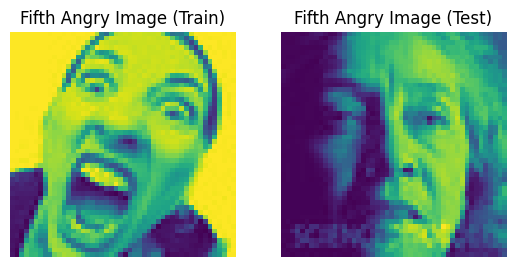

In [ ]:
# Show the 5th image from the train dataset
plt.subplot(1, 2, 1)
plt.imshow(train_image5)
plt.title("Fifth Angry Image (Train)")
plt.axis('off')  # Hide axes

# Show the 5th image from the test dataset
plt.subplot(1, 2, 2)
plt.imshow(test_image5)
plt.title("Fifth Angry Image (Test)")
plt.axis('off')  # Hide axes

plt.show()

In [ ]:
# Convert the images to numpy arrays (pixel values)
train_image5_array = np.array(train_image5)
test_image5_array = np.array(test_image5)

In [ ]:
# Display the pixel values
print("Pixel values of the fifth Angry image (Train):")
print(train_image5_array)

print("\nPixel values of the fifth Angry image (Test):")
print(test_image5_array)

Pixel values of the fifth Angry image (Train):
[[255 255 255 ... 254 255 254]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 254 255]
 ...
 [ 14   8  40 ... 189 234 254]
 [ 11   2  93 ... 168 247 255]
 [ 14   1 143 ... 185 254 254]]

Pixel values of the fifth Angry image (Test):
[[ 3  4  5 ... 67 71 63]
 [ 3  3  3 ... 67 73 63]
 [ 4  3  3 ... 72 65 65]
 ...
 [ 0  6  9 ... 71 63 82]
 [ 3  0  3 ... 24 42 49]
 [ 3  3  0 ... 23 36 55]]


In [ ]:
train_images[8].ndim


2

In [ ]:
train_images.shape

(28709, 64, 64)

**DATA AUGMENTATION**
Summary
Data augmentation increases training data variety without collecting new images.

Use ImageDataGenerator for classic augmentation.

Use tf.keras.layers.Random* for TensorFlow 2.0 models.

Apply augmentation only to the training dataset, not the test set.

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define the data augmentation strategy
# datagen = ImageDataGenerator(
#     rotation_range=20,        # Randomly rotate images by up to 20 degrees
#     width_shift_range=0.2,    # Randomly shift the image horizontally
#     height_shift_range=0.2,   # Randomly shift the image vertically
#     shear_range=0.2,          # Shear transformation
#     zoom_range=0.2,           # Random zoom
#     horizontal_flip=True,     # Randomly flip images horizontally
#     fill_mode='nearest'       # Fill mode for new pixels
# )

# # Apply augmentation to the training dataset
# datagen.fit(train_images)

**Solution: Expand the dimensions**

Since your dataset is grayscale, it has only two spatial dimensions (64, 64), and it lacks a channel dimension.

For grayscale images, the correct shape should be (28709, 64, 64, 1) where 1 represents the number of channels (grayscale).

You can fix this using np.expand_dims().

In [ ]:
# Expand dimensions to add a channel (grayscale has 1 channel)
train_images = np.expand_dims(train_images, axis=-1)  # Shape becomes (28709, 64, 64, 1)
test_images = np.expand_dims(test_images, axis=-1)    # Same for test data

In [ ]:
print(train_images.shape)

(28709, 64, 64, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation strategy
datagen = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift the image horizontally
    height_shift_range=0.2,   # Randomly shift the image vertically
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill mode for new pixels
)

# Apply augmentation to the training dataset
datagen.fit(train_images)

**Define the CNN Model**

In [ ]:
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


# Define CNN model
model = models.Sequential([
    # Data Augmentation Layer (Optional)

   tf.keras.layers.Rescaling(1./255),  # Normalize pixel values (0 to 1)

    # Conv Layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D(2,2),

    # Conv Layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # Conv Layer 3
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(7, activation='softmax')  # 7 output classes for emotions
])

# Compile Model
#optimizer = Adam
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
print(tf.__version__)  # Should be 2.6 or higher

2.18.0


Solution 1: Explicitly Build the Model
After defining your model, call the build() method with the input shape, including a batch dimension (usually None for flexibility):

In [ ]:
model.build(input_shape=(None, 64, 64, 1))

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,527 (2.61 MB)

 Trainable params: 683,527 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

This is the summary of a Convolutional Neural Network (CNN) model, typically used for image classification tasks. The model architecture includes multiple layers such as convolutional layers, max pooling layers, dropout layers, and fully connected layers.

Here’s a breakdown of each layer and its function:

1. Rescaling Layer (rescaling_4)
Type: Rescaling

Output Shape: (None, 64, 64, 1)

Parameters: 0

Explanation: This layer rescales the input image data (typically pixel values) to a specific range. For example, if you're using image data, this could scale pixel values to a range of [0, 1].

2. Convolutional Layer (conv2d)
Type: Conv2D (2D Convolution)

Output Shape: (None, 62, 62, 32)

Parameters: 320

Explanation: This layer applies 32 convolutional filters (kernels) to the input image, resulting in 32 feature maps. The kernel size is likely 3x3, which reduces the spatial dimensions from 64x64 to 62x62 due to padding and stride settings.

3. Max Pooling Layer (max_pooling2d)
Type: MaxPooling2D

Output Shape: (None, 31, 31, 32)

Parameters: 0

Explanation: This layer performs max pooling, which reduces the spatial dimensions of the feature maps (from 62x62 to 31x31) by selecting the maximum value in each 2x2 region.

4. Second Convolutional Layer (conv2d_1)
Type: Conv2D

Output Shape: (None, 29, 29, 64)

Parameters: 18,496

Explanation: This layer applies 64 convolutional filters to the output of the previous layer, resulting in 64 feature maps. The spatial dimensions are reduced from 31x31 to 29x29.

5. Second Max Pooling Layer (max_pooling2d_1)
Type: MaxPooling2D

Output Shape: (None, 14, 14, 64)

Parameters: 0

Explanation: This layer applies max pooling again, reducing the spatial dimensions from 29x29 to 14x14.

6. Third Convolutional Layer (conv2d_2)
Type: Conv2D

Output Shape: (None, 12, 12, 128)

Parameters: 73,856

Explanation: This layer applies 128 filters to the input from the previous layer, producing 128 feature maps. The spatial dimensions are reduced from 14x14 to 12x12.

7. Third Max Pooling Layer (max_pooling2d_2)
Type: MaxPooling2D

Output Shape: (None, 6, 6, 128)

Parameters: 0

Explanation: Max pooling reduces the spatial dimensions from 12x12 to 6x6.

8. Flatten Layer (flatten)
Type: Flatten

Output Shape: (None, 4608)

Parameters: 0

Explanation: This layer flattens the 3D output from the previous layer (6x6x128) into a 1D vector of size 4608, which will be fed into the fully connected (dense) layers.

9. Fully Connected Layer (dense)
Type: Dense

Output Shape: (None, 128)

Parameters: 589,952

Explanation: This is a fully connected layer with 128 neurons. It takes the flattened vector and applies weights and biases to produce 128 outputs.

10. Dropout Layer (dropout)
Type: Dropout

Output Shape: (None, 128)

Parameters: 0

Explanation: Dropout is used to prevent overfitting by randomly setting a fraction of input units to zero during training. In this case, it's applied to the output of the previous dense layer.

11. Output Layer (dense_1)
Type: Dense

Output Shape: (None, 7)

Parameters: 903

Explanation: This is the final output layer with 7 units (one for each emotion category). This layer likely uses softmax activation to output probabilities for the seven emotion categories: Angry (0), Disgust (1), Fear (2), Happy (3), Sad (4), Surprise (5), and Neutral (6).

Total Parameters:
The total number of parameters in this model is the sum of the parameters from all the layers, which is around 682,527.

**Train the Model**

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 209s 232ms/step - accuracy: 0.2471 - loss: 1.8252 - val_accuracy: 0.2471 - val_loss: 1.8136
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 259s 229ms/step - accuracy: 0.2516 - loss: 1.8170 - val_accuracy: 0.2471 - val_loss: 1.8133
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 256s 223ms/step - accuracy: 0.2496 - loss: 1.8163 - val_accuracy: 0.2471 - val_loss: 1.8132
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 201s 221ms/step - accuracy: 0.2501 - loss: 1.8122 - val_accuracy: 0.2471 - val_loss: 1.8131
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 199s 218ms/step - accuracy: 0.2516 - loss: 1.8136 - val_accuracy: 0.2471 - val_loss: 1.8138
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 203s 219ms/step - accuracy: 0.2499 - loss: 1.8145 - val_accuracy: 0.2471 - val_loss: 1.8140
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 202s 219ms/step - accuracy: 0.2542 - loss: 1.8055 - val_accuracy: 0.2471 - val_loss: 1.8136
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 208s 227ms/step - accuracy: 0.2579 -

**Evaluate the Model:**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.0356 - loss: 1.9156
Test Accuracy: 0.24714405834674835


Training Accuracy: 0.0356 i.e very low

Test Accuracy: 0.2471 i.e very low

**Make Predictions:**

In [ ]:
predictions = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step


**Visualize the Results (Optional):**

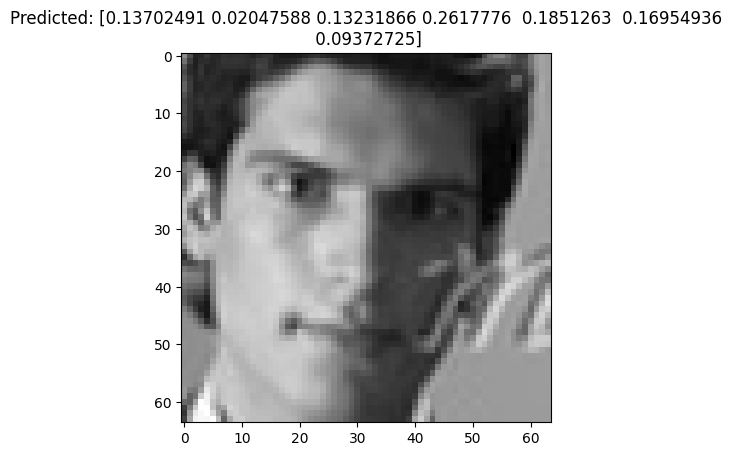

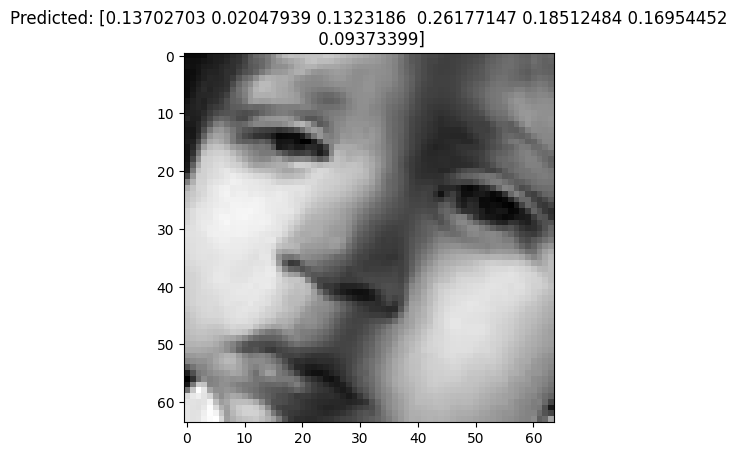

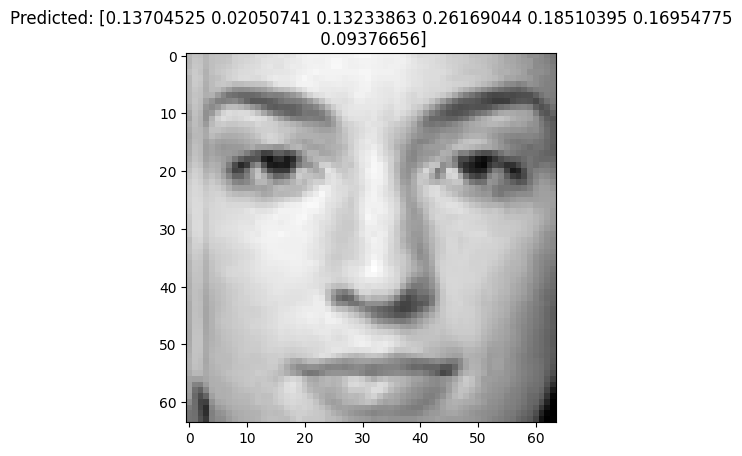

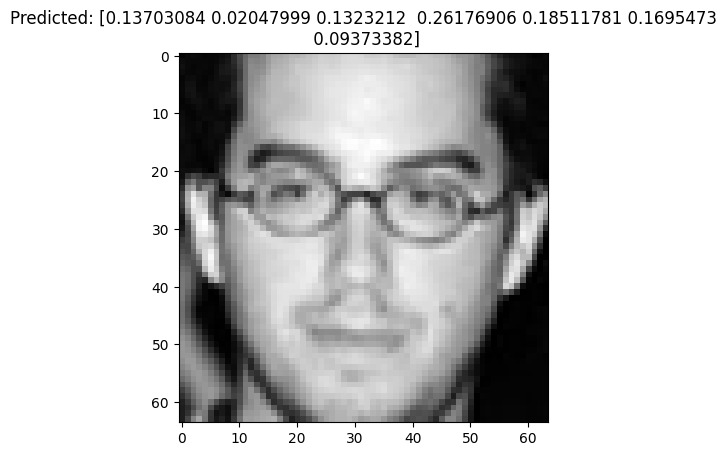

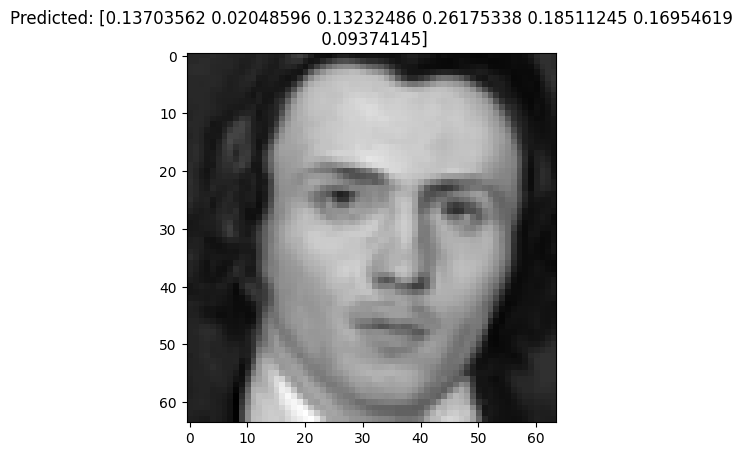

In [ ]:
# Example: Plot some test images along with their predictions
for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predictions[i]}")
    plt.show()

**Check the Model’s Performance (Metrics):**

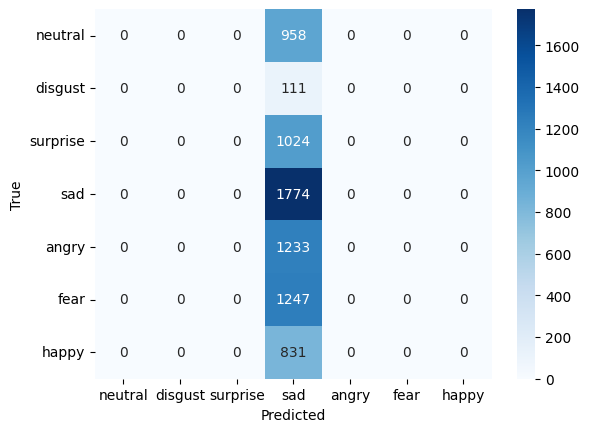

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
class_names = os.listdir(train_dir)# # Extract class names from train directory
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Save the Model:**

In [ ]:
model.save('iqbal-facial emotion CNN.h5')

**Loading the Saved Model**
If you want to load the model later for inference or further training, use:

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model('iqbal-facial emotion CNN.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'iqbal-facial emotion CNN.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)